In [43]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings("default")
import sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
from sklearn import model_selection
import time
from sklearn.neural_network import MLPRegressor

pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000

In [44]:
import os
dr = 'exp/prepared/'
file_names = os.listdir(dr)

def lowerstr(f):
    for col in f:
        if '№ партии' in col:
            f['№ партии'] = f['№ партии'].str.lower()
        if '№ плавки' in col:
            f['№ плавки'] = f['№ плавки'].str.lower()
    return f


df_modes = pd.read_excel('merge_table_mean_chem.xlsx')
table_stretching = pd.read_excel(dr+file_names[17])
table_stretching = lowerstr(table_stretching)

In [117]:
ls_all = [
#     'Поставщик',
#     'НД (гост, ту)',
#     'ГОСТ, ТУ',
#     'Дата форм. цехом',
#     'марка стали',
#     '№ плавки',
#     'кол-во, шт.',
#     '№ партии',
    '1 зона по ВТР закалка', 
#     '1 зона уставка закалка',
#     '1 зона фактическая температура закалка', 
    '2 зона по ВТР закалка',
    '3 зона по ВТР закалка', 
#     '3 зона уставка закалка',
#     '3 зона фактическая температура закалка',
    'Температура трубы на выгрузке из печи закалки',
    'Скорость прохождения трубы через спрейер, м/с',
    't˚ C трубы после спреера', 
    'Расход воды на закалочный спрейер, м3',
#     'время выдержки в закалочной ванне, сек.',
#     't˚ C воды в закалочной ванне', 
#     't˚ C трубы после ванны',
#     '1 зона ВТР и уставка отпуск', 
#     '1 зона фактическая температура отпуск',
    '2 зона ВТР и уставка отпуск', 
    '3 зона ВТР и уставка отпуск',
#     '3 зона фактическая температура отпуск', 
    '4 зона ВТР и уставка отпуск',
    '5 зона ВТР и уставка отпуск', 
#     '5 зона фактическая температура отпуск',
    'Температура трубы на выгрузке из печи отпуска',
    'шаг балок закалочная печь, сек', 
    'шаг балок отпускная печь, сек',
    'диаметр', 
    'толщина стенки', 
    'C', 
    'Mn', 
    'Si', 
    'P', 
    'S',
    'Cr', 
    'Ni', 
    'Cu', 
    'Al', 
    'V', 
    'Ti', 
    'Nb', 
    'Mo', 
    'N', 
    'B'
]

In [118]:
col_fluidity = [
    'Предел текучести (1141)',
    'Предел текучести (1027)',
    'Предел текучести, Н/мм2 или МПа',
    'Предел текучести , кгс/мм2',
    'Предел текучести, кгс/мм2'
]

for col in col_fluidity:
    table_stretching[col] = table_stretching[col].apply(lambda x: str(x))

In [119]:
tmpgrp = table_stretching.groupby(['Тип предела текучести (1186)', 'Предел текучести (1141)']).first()
tmpgrp.shape

(1916, 33)

In [120]:
tmp = []
for x in range(0, table_stretching.shape[0]):
    if (table_stretching['Предел текучести (1141)'][x] != 'nan'):
        tmp.append(table_stretching['Предел текучести (1141)'][x])
    else:
        if (table_stretching['Предел текучести (1027)'][x] != 'nan'):
            tmp.append(table_stretching['Предел текучести (1027)'][x])
        else:
            if (table_stretching['Предел текучести, Н/мм2 или МПа'][x] != 'nan'):
                tmp.append(table_stretching['Предел текучести, Н/мм2 или МПа'][x])
            else:
                if (table_stretching['Предел текучести , кгс/мм2'][x] != 'nan'):
                    tmp.append(table_stretching['Предел текучести , кгс/мм2'][x])
                else:
                    if (table_stretching['Предел текучести, кгс/мм2'][x] != 'nan'):
                        tmp.append(table_stretching['Предел текучести, кгс/мм2'][x])
                    else:
                        tmp.append('')
                


for x in tmp:
    print(x)

49.96609443591849
50.52693835305634
48.99736403358946
79.0
71.5
53.0
64.54803628150286
40.5
69.0
67.0
58.5
72.0
76.0
46.5
86.5
70.5
52.0
75.0
65.0
66.5
59.5
88.5
71.0
77.5
72.5
63.0
59.0
63.0
67.0
59.0
39.5
31.5
50.5
57.5
80.40462339330965
68.5
49.711165382674
48.18159106320712
49.0
40.0
70.76830518066822
67.0
45.78525796270898
66.0
46.5
45.0
45.5
66.0
73.5
67.5
63.5
63.5
69.5
68.5
67.5
40.0
39.0
71.5
65.0
41.0
39.5
74.5
77.5
53.5
78.62012002059828
89.02122539297314
75.56097138166449
91.92741659996024
81.27138217434089
87.44066526285735
86.01306256468825
47.5
47.0
48.0
44.5
45.5
51.0
54.0
72.5
69.0
68.16802883757451
77.70237542891813
68.0
75.5
73.77646800895312
77.0
70.25844707417926
82.5
72.6037943640285
77.09054570113138
52.0
64.0
63.63029168982273
67.86211397368113
63.73226331112052
64.14014979631169
66.944369382001
66.28155384356533
63.83423493241831
65.97563897967196
64.75197952409845
66.79141195005431
67.40324167784107
65.72070992642747
66.63845451810761
66.28155384356533
71.7880

42.0
46.5
47.5
45.5
39.5
46.0
43.0
42.0
85.70714770079488
72.4508369320818
58.5
86.36996323923053
72.04295044689063
44.0
48.0
47.5
45.5
44.5
42.0
48.0
40.0
41.5
48.0
45.0
45.5
76.88660245853579
67.14831262459658
69.95253221028588
64.0891639856628
66.63845451810761
68.01507140562782
60.62212886153784
66.43451127551202
45.5
44.0
44.0
74.0823828728465
74.38829773673987
69.85056058898809
62.76353290879149
63.37536263657825
43.0
42.0
37.0
46.5
36.0
42.5
42.0
48.0
68.3209862695212
68.83084437601016
68.62690113341458
69.54464572509471
68.57591532276568
66.84239776070321
69.34070248249913
39.5
39.5
44.0
43.5
39.5
37.0
44.0
43.5
43.0
45.0
44.0
40.5
41.5
63.78324912176942
65.00690857734293
66.02662479032085
68.77985856536127
69.7485889676903
71.38013490845498
57.10410792676399
66.28155384356533
68.16802883757451
69.90154639963698
67.25028424589438
69.95253221028588
68.06605721627672
68.2190146482234
67.04634100329879
61.1829727786757
67.91309978433003
63.83423493241831
68.72887275471237
63.01846

74.84717003257994
73.77646800895312
69.49365991444581
66.6894403287565
67.70915654173444
64.39507884955617
65.56775249448079
66.9953551926499
68.72887275471237
70.25844707417926
64.65000790280065
68.83084437601016
66.02662479032085
64.24212141760948
65.465780873183
66.23056803291644
67.09732681394769
69.23873086120133
61.74381669581356
65.97563897967196
64.44606466020507
64.95592276669403
68.98380180795685
66.6894403287565
67.60718492043665
68.83084437601016
67.60718492043665
67.91309978433003
67.40324167784107
65.77169573707637
67.14831262459658
66.84239776070321
68.62690113341458
66.38352546486313
67.09732681394769
66.38352546486313
66.07761060096975
70.51337612742374
66.58746870745871
65.3128234412363
67.60718492043665
68.2190146482234
67.70915654173444
66.6894403287565
66.48549708616092
67.50521329913886
69.08577342925464
65.97563897967196
69.6976031570414
38.0
30.0
48.0
43.0
43.5
71.0232342339127
72.14492206818842
71.88999301494394
69.13675923990354
67.04634100329879
67.5052132991

71.73703558299725
67.96408559497893
71.32914909780608
51.59764037668317
66.33253965421423
66.944369382001
73.01168084921967
66.12859641161864
66.84239776070321
65.51676668383189
63.78324912176942
49.86412281462069
71.78802139364615
77.3
67.5
71.53309234040167
74.38829773673987
38.0
41.0
50.5
44.5
47.0
86.11503418598605
95.1905084814896
88.35840985453748
38.5
39.5
38.0
73.0
74.0
71.5
68.0
66.5
66.0
70.5
69.5
63.52832006852493
32.5
88.30742404388859
83.25982878964784
82.59701325121219
90.14291322724887
84.12658757067908
86.93080715636839
89.73502674205768
85.50320445819929
88.00150917999521
90.95868619763121
44.5
43.5
41.5
66.84239776070321
70.76830518066822
68.88183018665906
71.22717747650829
67.86211397368113
68.2190146482234
67.0
43.5
42.0
43.5
45.5
42.0
44.0
87.0
87.0
47.0
47.0
38.5
36.5
38.5
93.8648774046183
60.0
68.77985856536127
68.72887275471237
44.0
41.0
41.0
49.0
45.0
41.5
71.38013490845498
70.56436193807264
65.26183763058741
72.80773760662409
74.43928354738877
66.0776106009697

72.0
76.0
73.5
65.0
75.5
76.6826592159402
73.0
75.71392881361118
77.0
70.5
73.82745381960201
76.27477273074904
69.0
73.82745381960201
76.5
76.01984367750455
74.43928354738877
73.5
44.0
47.5
56.0
55.0
42.0
44.0
51.0
52.0
69.6466173463925
70.00351802093478
68.72887275471237
68.3719720801701
66.84239776070321
70.56436193807264
77.70237542891813
67.35225586719217
64.44606466020507
65.72070992642747
68.83084437601016
76.0
76.0
67.25028424589438
64.0381781750139
68.01507140562782
67.96408559497893
68.01507140562782
67.81112816303224
68.3209862695212
67.86211397368113
69.23873086120133
68.98380180795685
66.17958222226754
66.28155384356533
69.7485889676903
70.51337612742374
68.3719720801701
78.5
60.0
64.0
68.5
67.25028424589438
66.79141195005431
67.04634100329879
66.43451127551202
68.2190146482234
68.83084437601016
67.50521329913886
67.91309978433003
67.76014235238334
63.73226331112052
71.22717747650829
65.97563897967196
66.28155384356533
66.6894403287565
64.24212141760948
71.0
66.128596411618

40.5
42.0
39.0
46.5
38.0
40.5
39.0
62.35564642360031
63.22240520463156
61.64184507451576
68.5
64.29310722825838
64.65000790280065
66.0
66.07761060096975
76.0
63.88522074306721
72.5
81.57729703823426
69.34070248249913
78.0
65.26183763058741
88.35840985453748
61.48888764256908
82.90292811510557
63.57930587917383
64.49705047085396
94.06882064721388
71.0232342339127
64.95592276669403
63.987192364365
61.1319869680268
63.22240520463156
63.57930587917383
50.5
48.0
43.5
45.5
37.0156985310988
87.03277877766618
82.4950416299144
64.65000790280065
65.0
66.43451127551202
61.69283088516466
68.5
66.63845451810761
40.5
44.0
41.5
41.5
49.0
40.5
42.0
40.0
43.0
48.5
49.0
43.0
44.5
45.0
43.0
44.0
44.5
43.5
44.0
42.0
45.5
42.5
42.5
43.5
45.0
45.0
42.0
44.0
44.0
42.06329378533954
43.0
45.5
43.0
43.5
44.0
45.5
42.0
46.0
43.0
44.0
44.0
44.5
45.0
42.5
44.5
59.29649778466653
58.78663967817756
80.0
78.0
74.0
74.5
76.93758826918469
69.0
760.0
79.0
66.0
72.5
70.30943288482815
89.63305512075989
76.07082948815345
80

64.70099371344955
67.04634100329879
66.53648289680982
64.29310722825838
61.1319869680268
66.58746870745871
68.01507140562782
65.26183763058741
67.30127005654327
64.80296533474734
65.3638092518852
66.33253965421423
67.91309978433003
65.3128234412363
67.14831262459658
66.33253965421423
66.07761060096975
66.38352546486313
65.82268154772527
68.11704302692561
66.79141195005431
66.84239776070321
65.56775249448079
58.2767815716886
63.5
59.0
65.10888019864072
66.38352546486313
57.5
60.5
64.29310722825838
67.60718492043665
63.57930587917383
61.1319869680268
70.30943288482815
58.5
64.5
59.0
64.85395114539624
62.20268899165362
62.10071737035583
44.5
50.5
56.0
68.93281599730796
67.30127005654327
65.26183763058741
68.77985856536127
69.34070248249913
65.3128234412363
71.0232342339127
69.6976031570414
68.06605721627672
67.30127005654327
69.18774505055244
69.49365991444581
68.93281599730796
64.0381781750139
72.5018227427307
69.18774505055244
66.8933835713521
72.90970922792188
75.3570281390689
66.53648

42.5
44.5
50.0
47.0
45.0
45.5
45.5
45.5
45.0
37.0
36.0
40.0
37.0
44.0
47.5
48.5
46.5
46.0
46.0
43.5
45.0
41.0
41.0
46.5
44.0
63.78324912176942
69.34070248249913
67.30127005654327
69.08577342925464
67.81112816303224
64.75197952409845
67.76014235238334
63.01846196203597
64.80296533474734
65.97563897967196
44.0
41.5
41.0
41.0
44.5
45.0
45.5
28.5
48.0
43.5
43.0
45.5
47.0
41.5
37.5
35.5
94.32374970045836
42.5
45.5
42.0
41.5
45.0
44.5
44.0
44.5
43.2
43.0
43.5
42.0
41.5
45.5
39.5
45.5
43.0
39.5
37.5
43.0
40.0
44.5
41.0
37.5
46.0
38.5
50.0
42.52216608117961
40.0
44.0
47.5
43.5
44.5
42.5
41.0
43.5
44.0
41.5
39.5
43.0
43.0
40.5
41.5
46.0
37.0
38.0
37.0
39.0
42.5
44.0
46.0
45.0
48.0
46.0
43.0
45.0
42.0
43.5
44.5
41.5
67.45422748848996
62.96747615138707
784.5
755.0
69.18774505055244
69.0
42.5
40.0
43.0
46.0
41.5
44.0
46.5
46.0
44.0
33.0
47.0
47.0
46.0
44.0
47.0
90.55079971244004
98.55557198431677
92.539246327747
66.9953551926499
73.0
63.0
89.07221120362203
93.96684902591609
91.1626294402268
93.151

46.0
45.0
45.5
46.5
42.5
43.5
48.5
44.5
44.0
47.0
45.5
46.5
46.5
46.0
47.0
49.0
48.5
48.0
47.5
47.0
47.5
42.5
65.92465316902306
67.91309978433003
66.23056803291644
66.28155384356533
73.06266665986857
66.944369382001
63.27339101528045
62.71254709814259
68.93281599730796
68.42295789081899
67.76014235238334
61.69283088516466
66.53648289680982
66.79141195005431
65.21085181993851
67.14831262459658
70.30943288482815
69.90154639963698
70.30943288482815
66.28155384356533
66.84239776070321
67.40324167784107
66.12859641161864
66.12859641161864
71.27816328715718
70.20746126353036
66.79141195005431
70.81929099131712
71.27816328715718
68.06605721627672
59.44945521661322
69.34070248249913
64.75197952409845
66.84239776070321
62.20268899165362
67.55619910978776
64.65000790280065
68.2190146482234
65.97563897967196
58.12382413974191
61.69283088516466
62.40663223424921
67.70915654173444
66.07761060096975
58.58269643558198
66.6894403287565
66.944369382001
68.93281599730796
58.83762548882646
66.94436938200

64.80296533474734
61.84578831711135
70.0
63.9362065537161
62.76353290879149
66.63845451810761
62.91649034073818
69.95253221028588
62.6105754768448
69.18774505055244
60.26522818699556
64.24212141760948
66.8933835713521
63.987192364365
63.63029168982273
69.49365991444581
68.3209862695212
70.46239031677484
64.14014979631169
77.0
79.0
38.0
45.0
41.0
95.80233820927637
82.24011257666992
88.0524949906441
86.7268639137728
85.91109094339046
88.40939566518638
73.21562409181526
77.34547475437586
67.09732681394769
65.61873830512968
68.06605721627672
64.70099371344955
58.53171062493308
68.93281599730796
63.52832006852493
77.60040380762034
64.85395114539624
66.63845451810761
73.82745381960201
66.58746870745871
56.33932076703054
66.8933835713521
63.06944777268487
68.11704302692561
46.29511606919795
84.5
83.5
75.5
76.0
70.41140450612595
74.0
52.71932821095889
68.98380180795685
67.86211397368113
70.20746126353036
63.83423493241831
78.0
67.14831262459658
66.38352546486313
67.55619910978776
69.1367592399

73.36858152376195
78.0
82.24011257666992
74.94914165387773
79.07899231643835
82.29109838731881
65.5
66.0
77.5
77.5
76.5
74.5
72.14492206818842
73.41956733441084
71.78802139364615
74.0313970621976
56.33932076703054
59.34748359531542
65.5
63.37536263657825
62.86550453008928
79.5
69.5
74.5
79.0
38.85118771445907
42.7261093237752
40.68667689781934
42.87906675572189
42.52216608117961
40.83963432976603
44.76554174973105
39.05513095705465
40.53371946587265
40.99259176171272
41.2475208149572
41.2475208149572
36.70978366720542
40.22780460197927
40.73766270846824
43.54188229415754
41.04357757236161
38.392315418619
41.70639311079726
42.06329378533954
36.50584042460984
42.87906675572189
39.05513095705465
43.89878296869981
41.14554919365941
39.36104582094804
41.80836473209506
42.01230797469064
39.97287554873479
37.11767015239659
67.0
68.5
72.0
76.0
49.0
48.0
68.0
68.0
68.52492951211678
65.05789438799182
73.47055314505974
70.00351802093478
68.77985856536127
73.47055314505974
67.81112816303224
73.113

94.0
93.0
48.0
46.39708769049574
81.27138217434089
77.19251732242917
77.5
42.0
76.5
79.0
75.81590043490897
76.47871597334462
78.0
78.5
79.94575109746958
76.27477273074904
74.13336868349539
78.0
80.0
80.0
78.0
47.0
83.5
87.5
87.0
84.0
69.79957477833919
91.82544497866245
89.88798417400437
81.57729703823426
85.3502470262526
84.99334635171033
87.54263688415514
84.12658757067908
79.7927936655229
86.7268639137728
90.85671457633342
89.98995579530217
90.70375714438673
81.88321190212764
90.24488484854666
86.7268639137728
83.31081460029674
74.0
77.0
78.0
78.0
72.0
74.0
72.0
74.5
67.60718492043665
68.2700004588723
69.79957477833919
75.0
68.5
78.5
76.5
74.5
75.0
70.5
71.0
69.5
77.5
76.0
70.0
71.5
73.5
69.0
72.0
72.0
73.0
72.5
80.0
70.5
74.0
75.3570281390689
71.78802139364615
67.25028424589438
73.72548219830422
71.99196463624173
70.92126261261491
70.20746126353036
75.66294300296228
71.48210652975277
74.33731192609098
72.5018227427307
73.01168084921967
65.97563897967196
67.76014235238334
78.41617677

66.5
44.0
65.0

69.5
42.0
61.5
67.0
68.5
69.5
64.0


63.5
66.5


60.5
65.5

69.5
65.5
59.5
86.0
86.5
86.0
85.5
75.5
110.0
78.0
107.5
80.0
110.0
72.0
107.5
77.0
75.5
107.5
97.5
70.0
62.0
66.0
63.5
66.0
57.5
68.0
63.0
41.0
40.0
42.0
78.0
104.5
77.5
68.5
82.5
76.0
86.0
86.0
87.0
65.0
67.0
65.5
74.0
79.0
73.5
81.0
75.0
73.5
71.5
73.0
80.5
74.5
105.0
73.5
105.0
67.0
100.0
95.0
103.5
71.5
102.0

31.5
105.0
97.5
59.0
99.5
68.5
102.0
97.0
72.0
103.5
99.0
102.0
100.0
67.0
44.0
44.5
43.0
45.0
42.0
46.5
44.5
53.5
59.5
72.5
66.8933835713521
38.54527285056569
37.93344312277893
40.99259176171272
39.66696068484141
39.92188973808589
91.1116436295779
81.47532541693647
90.90770038698231
89.5310834994621
66.07761060096975
69.23873086120133
61.50928196682864
66.07761060096975
80.0
74.5
67.5
66.6894403287565
85.0
92.5
42.0
74.0823828728465
73.31759571311305
71.22717747650829
67.70915654173444
67.40324167784107
78.51814839930049
87.0
88.97023958232424
70.0
74.5
74.18435449414429
70.66633355937043
69.5446457

69.03478761860575
45.5
91.46854430412017
92.02938822125803
77.90631867151372
98.0966996884767
90.49981390179114
95.59839496668077
91.67248754671576
94.06882064721388
83.31081460029674
88.2054524225908
94.0
71.48210652975277
71.88999301494394
92.5
94.0
68.52492951211678
93.0
71.1252058552105
92.5
77.19251732242917
70.76830518066822
71.58407815105056
88.71531052907976
94.52769294305395
93.0
70.61534774872153
67.50521329913886
73.06266665986857
92.0
92.5
45.0
87.38967945220845
81.57729703823426
89.17418282491982
90.65277133373783
81.27138217434089
90.49981390179114
80.04772271876737
42.0
42.5
87.49165107350625
92.02938822125803
40.5
87.79756593739963
86.6758781031239
81.27138217434089
90.65277133373783
83.56574365354122
89.12319701427093
88.51136728648417
86.31897742858163
90.34685646984445
90.95868619763121


In [121]:
for x in tmp:
    if x == '':
        print(x)

In [122]:
table_stretching['Предел текучести'] = tmp

In [123]:
df_merge = pd.merge(df_modes, table_stretching, how ='left', on = ['№ плавки','№ партии'])

chem = {'Mn': 0, 'Si': 0, 'P': 0, 'S': 0,
        'Cr': 0, 'Ni': 0, 'Cu': 0, 'Al': 0, 'V': 0, 
        'Ti': 0, 'Nb': 0, 'Mo': 0, 'N': 0, 'B': 0}

df_merge = df_merge.fillna(value = chem)

In [124]:
df_merge = df_merge[ls_all + ['Предел текучести', 'Тип предела текучести (1186)']]
df_merge = df_merge.dropna()

In [125]:
df_merge = df_merge[df_merge['Предел текучести'] != '']

In [126]:
df_merge = df_merge[df_merge['t˚ C трубы после спреера'] != ' ']

In [127]:
df_merge.shape

(20144, 33)

In [128]:
df_merge.to_excel('prepared_stretc.xlsx')

In [129]:
df_merge = df_merge.reset_index(drop=True)

In [130]:
df_merge['Тип предела текучести 0.2'] = 0
df_merge['Тип предела текучести 0.5'] = 0
df_merge['Тип предела текучести 0.6'] = 0

In [131]:
df_merge['Тип предела текучести (1186)'] = df_merge['Тип предела текучести (1186)'].apply(lambda x: str(x))

In [132]:
for i in range(df_merge.shape[0]):
    if df_merge.loc[:,('Тип предела текучести (1186)')][i] == '0.2':
        df_merge['Тип предела текучести 0.2'][i] = 1
    if df_merge['Тип предела текучести (1186)'][i] == '0.5':
        df_merge['Тип предела текучести 0.5'][i] = 1
    if df_merge['Тип предела текучести (1186)'][i] == '0.6':
        df_merge['Тип предела текучести 0.6'][i] = 1

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [133]:
df_merge.head()

,1 зона по ВТР закалка,2 зона по ВТР закалка,3 зона по ВТР закалка,Температура трубы на выгрузке из печи закалки,"Скорость прохождения трубы через спрейер, м/с",t˚ C трубы после спреера,"Расход воды на закалочный спрейер, м3",2 зона ВТР и уставка отпуск,3 зона ВТР и уставка отпуск,4 зона ВТР и уставка отпуск,5 зона ВТР и уставка отпуск,Температура трубы на выгрузке из печи отпуска,"шаг балок закалочная печь, сек","шаг балок отпускная печь, сек",диаметр,толщина стенки,C,Mn,Si,P,S,Cr,Ni,Cu,Al,V,Ti,Nb,Mo,N,B,Предел текучести,Тип предела текучести (1186),Тип предела текучести 0.2,Тип предела текучести 0.5,Тип предела текучести 0.6
0,850.0,850.0,860.0,852.0,0.54,50,2068.0,560.0,555.0,555.0,547.0,561.0,28.0,27.0,88.9,6.5,0.270,1.29,0.29,0.008,0.004,0.025,0.049,0.013,0.029,0.0049,0.0025,0.000,0.005,0.0,0.0,77.5,0.2,1,0,0
1,860.0,860.0,870.0,858.0,0.16,49,2013.0,540.0,536.0,536.0,528.0,538.0,33.0,32.0,140.0,12.5,0.200,0.43,0.27,0.007,0.003,0.070,0.100,0.110,0.000,0.0000,0.0000,0.000,0.000,0.0,0.0,78.62012002059828,0.2,1,0,0
2,860.0,860.0,870.0,854.0,0.12,55,2073.0,535.0,532.0,532.0,528.0,536.0,36.0,34.0,140.0,14.0,0.290,0.61,0.27,0.010,0.017,1.020,0.050,0.060,0.031,0.0000,0.0000,0.000,0.000,0.0,0.0,87.44066526285735,0.2,1,0,0
3,880.0,880.0,885.0,880.0,0.23,60,1983.0,705.0,673.0,691.0,656.0,702.0,42.0,38.0,114.0,10.0,0.212,0.54,0.32,0.011,0.006,0.357,0.047,0.010,0.031,0.0480,0.0040,0.037,0.005,0.0,0.0,47.0,0.2,1,0,0
4,880.0,880.0,885.0,878.0,0.30,45,1958.0,720.0,706.0,706.0,691.0,721.0,42.0,38.0,114.0,8.0,0.200,0.42,0.18,0.013,0.016,0.030,0.060,0.050,0.029,0.0700,0.0000,0.036,0.005,0.0,0.0,44.5,0.2,1,0,0


In [134]:
df_merge = df_merge.drop(['Тип предела текучести (1186)'], axis =1)
df_merge.head()

,1 зона по ВТР закалка,2 зона по ВТР закалка,3 зона по ВТР закалка,Температура трубы на выгрузке из печи закалки,"Скорость прохождения трубы через спрейер, м/с",t˚ C трубы после спреера,"Расход воды на закалочный спрейер, м3",2 зона ВТР и уставка отпуск,3 зона ВТР и уставка отпуск,4 зона ВТР и уставка отпуск,5 зона ВТР и уставка отпуск,Температура трубы на выгрузке из печи отпуска,"шаг балок закалочная печь, сек","шаг балок отпускная печь, сек",диаметр,толщина стенки,C,Mn,Si,P,S,Cr,Ni,Cu,Al,V,Ti,Nb,Mo,N,B,Предел текучести,Тип предела текучести 0.2,Тип предела текучести 0.5,Тип предела текучести 0.6
0,850.0,850.0,860.0,852.0,0.54,50,2068.0,560.0,555.0,555.0,547.0,561.0,28.0,27.0,88.9,6.5,0.270,1.29,0.29,0.008,0.004,0.025,0.049,0.013,0.029,0.0049,0.0025,0.000,0.005,0.0,0.0,77.5,1,0,0
1,860.0,860.0,870.0,858.0,0.16,49,2013.0,540.0,536.0,536.0,528.0,538.0,33.0,32.0,140.0,12.5,0.200,0.43,0.27,0.007,0.003,0.070,0.100,0.110,0.000,0.0000,0.0000,0.000,0.000,0.0,0.0,78.62012002059828,1,0,0
2,860.0,860.0,870.0,854.0,0.12,55,2073.0,535.0,532.0,532.0,528.0,536.0,36.0,34.0,140.0,14.0,0.290,0.61,0.27,0.010,0.017,1.020,0.050,0.060,0.031,0.0000,0.0000,0.000,0.000,0.0,0.0,87.44066526285735,1,0,0
3,880.0,880.0,885.0,880.0,0.23,60,1983.0,705.0,673.0,691.0,656.0,702.0,42.0,38.0,114.0,10.0,0.212,0.54,0.32,0.011,0.006,0.357,0.047,0.010,0.031,0.0480,0.0040,0.037,0.005,0.0,0.0,47.0,1,0,0
4,880.0,880.0,885.0,878.0,0.30,45,1958.0,720.0,706.0,706.0,691.0,721.0,42.0,38.0,114.0,8.0,0.200,0.42,0.18,0.013,0.016,0.030,0.060,0.050,0.029,0.0700,0.0000,0.036,0.005,0.0,0.0,44.5,1,0,0


In [150]:
df_merge = df_merge[df_merge['Cr'] < 10]

df_merge['C-coef'] = ((df_merge['C'] + df_merge['Mn'])/6.0 + (df_merge['Cr'] + df_merge['Mo'] + df_merge['V'])/5.0 +
                        (df_merge['Ni'] + df_merge['Cu'])/15.0)

bd = dict(df_merge['C-coef'].value_counts())
bd = pd.DataFrame(list(bd.items()))
bd

,0,1
0,0.314000,113
1,0.319667,107
2,0.310667,100
3,0.309667,90
4,0.316667,88
5,0.314333,84
6,0.312667,84
7,0.319333,82
8,0.314667,81
9,0.316000,81


[]


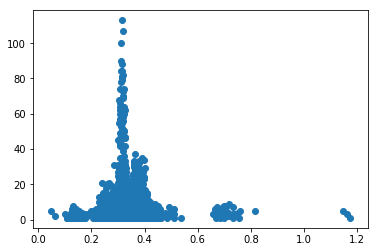

In [162]:
import matplotlib.pyplot as plt

fig = plt.figure()   # Создание объекта Figure
print (fig.axes)   # Список текущих областей рисования пуст
plt.scatter(bd[0], bd[1])   # scatter - метод для нанесения маркера в точке (1.0, 1.0)
plt.show()

[]


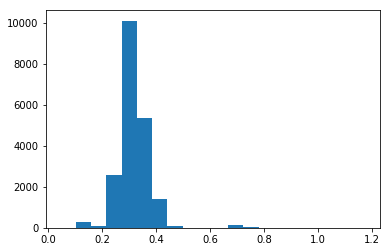

In [179]:
fig = plt.figure()   # Создание объекта Figure
print (fig.axes)   # Список текущих областей рисования пуст
plt.hist(df_merge['C-coef'], bins=20)
plt.show()

In [ ]:
fig = plt.figure()   # Создание объекта Figure
print (fig.axes)   # Список текущих областей рисования пуст
plt.hist(scaler(df_merge['C-coef']), bins=20)
plt.show()

In [135]:
y = pd.DataFrame()
X = pd.DataFrame()

y['Предел текучести'] = df_merge['Предел текучести']

for i in ls_all+['Тип предела текучести 0.2','Тип предела текучести 0.5', 'Тип предела текучести 0.6']:
    X[i] = df_merge[i]

In [136]:
for col in X:
    for x in X[col]:
        try:
            x = float(x)
        except:
            print(col, x)

In [137]:
for x in y['Предел текучести']:
    try:
        x = float(x)
    except:
        print(x)

In [138]:
scaler = StandardScaler()  

X = scaler.fit_transform(X, y)

In [139]:
type(X)

numpy.ndarray

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [141]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13496, 34), (13496, 1), (6648, 34), (6648, 1))

In [142]:
y_train.dtypes

Предел текучести    object
dtype: object

In [143]:
'''
Подбор параметров деревьев решений
'''
from sklearn.model_selection import GridSearchCV

tree = RandomForestRegressor()

tree_params = {'max_depth': range(10,30, 10),'max_features': range(5,20, 5),  
               'min_samples_leaf': range(1,5), 'n_estimators':range(100,1100, 500)}

tree_grid = GridSearchCV(tree, tree_params,cv=5, verbose = True, n_jobs=-1)

tree_grid.fit(X_train, y_train)
y_pred_grid = tree_grid.predict(X_test)
print(tree_grid.best_params_)
print(tree_grid.best_score_)
print(mean_absolute_error(y_test, y_pred_grid))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  5.4min finished
C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 1, 'n_estimators': 100}
0.468288989957
3.4034672169


In [105]:
np.corrcoef(y_test.T,  y_pred_grid)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [149]:
import pickle

d = {
    '1 зона по ВТР закалка' : [876, 840, 850], 
    '2 зона по ВТР закалка' : [876, 840, 850],
    '3 зона по ВТР закалка' : [883, 850, 860], 
    'Температура трубы на выгрузке из печи закалки' : [875, 835, 840],
    'Скорость прохождения трубы через спрейер, м/с' : [0.3, 0.23, 0.33],
    't˚ C трубы после спреера' : [106, 75, 75],
    '1 зона ВТР и уставка отпуск' : [665, 664, 600], 
    '2 зона ВТР и уставка отпуск' : [665, 664, 600], 
    '3 зона ВТР и уставка отпуск' : [650, 653, 593],
    '4 зона ВТР и уставка отпуск' : [650, 653, 593],
    '5 зона ВТР и уставка отпуск' : [633, 637, 580], 
    'Температура трубы на выгрузке из печи отпуска' : [650, 679, 564],
    'шаг балок закалочная печь, сек' : [35, 31, 30], 
    'шаг балок отпускная печь, сек' : [35, 31, 30],
    'диаметр' : [187.71, 88.9, 168.28], 
    'толщина стенки' : [21, 12.2, 8.94], 
    'C' : [0.29, 0.37, 0.28], 
    'Mn' : [0.92, 1.28, 1.33], 
    'Si' : [0.26, 0.26, 0.26], 
    'P' : [0.009, 0.007, 0.01], 
    'S' : [0.005, 0.007, 0.007],
    'Cr' : [0.68, 0.32, 0.1], 
    'Ni' : [0.13, 0.13, 0.13], 
    'Cu' : [0.15, 0.18, 0.19], 
    'Al' : [0.03, 0.03, 0.03], 
    'V' : [0.007, 0.09, 0.005], 
    'Ti' : [0, 0.02, 0.007], 
    'Nb' : [0, 0.005, 0.007], 
    'Mo' : [0.16, 0.02, 0.017], 
    'N' : [0.008, 0.007, 0.01], 
    'B': [0, 0, 0.0005],
    'Тип предела текучести 0.2' : [0, 0, 0],
    'Тип предела текучести 0.5' : [0, 0, 0],
    'Тип предела текучести 0.6' : [0, 0, 0]   
}

df = pd.DataFrame(data=d)

s = pickle.dumps(tree_grid)
rfc2 = pickle.loads(s)
y = rfc2.predict(df)
print(y[1]*9.8)

586.811895995


In [30]:
'''
SVR
'''

C=1.0
ratio = 0.9
seed=17
epsilon=0.3

svr_eps = LinearSVR(C = C)

kfold = model_selection.KFold(n_splits=5, random_state=seed)

t0 = time.time()
cv_results = model_selection.cross_val_score(svr_eps, 
                                             X_train, np.ravel(y_train), cv=kfold, scoring='neg_mean_absolute_error')
t1 = time.time() - t0
print(cv_results.mean())

-4.06418256861


In [31]:
'''
Подбор параметров деревьев решений
'''
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeRegressor()

tree_params = {'max_depth': range(10,30),'max_features': range(5,20)}

tree_grid = GridSearchCV(tree, tree_params,cv=5, verbose = True)

tree_grid.fit(X_train, y_train)
y_pred_grid = tree_grid.predict(X_test)
print(tree_grid.best_params_)
print(tree_grid.best_score_)
print(mean_absolute_error(y_test, y_pred_grid))

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:  4.5min finished


{'max_depth': 10, 'max_features': 18}
0.455555166412
3.59526420902


In [85]:
y_test = scaler.fit_transform(y_test)

In [88]:
y_test.T

array([[-0.91716058,  0.00464674, -0.10254015, ..., -0.37196782,
        -0.17959943,  0.97898288]])

In [89]:
np.corrcoef(y_test.T,  y_pred_grid)

array([[ 1.        ,  0.74320075],
       [ 0.74320075,  1.        ]])

In [32]:
tree_grid.best_params_['max_depth']

10

In [33]:
'''
Дерево решений
'''
kfold = model_selection.KFold(n_splits=5, random_state=seed)




tree = DecisionTreeRegressor(max_depth = tree_grid.best_params_['max_depth'], max_features = tree_grid.best_params_['max_features'])


cv_results = model_selection.cross_val_score(tree, 
                                             X_train, np.ravel(y_train), cv=kfold, scoring='neg_mean_absolute_error')


tree.fit(X_train, y_train)

y_predicted = tree.predict(X_test)

scr = tree.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_predicted)
print(scr, mae)

print(cv_results.mean())

0.0835172056747 3.68631033367
-4.07434499092


In [19]:
forest = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=17)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5)))

forest_params = {'max_depth': range(1,11), 'max_features': range(4,19)}

forest_grid = GridSearchCV(forest, forest_params, cv=5, verbose=True)

forest_grid.fit(X_train, y_train)
y_pred_grid = forest_grid.predict(X_test)
print(forest_grid.best_params_)
print(forest_grid.best_score_)
print(mean_absolute_error(y_test, y_pred_grid))

NameError: name 'X_train' is not defined

In [ ]:
forest = RandomForestRegressor(n_estimators=10000, n_jobs=-1, random_state=17)
tree = DecisionTreeRegressor(max_depth = forest_grid.best_params_['max_depth'], 
                             max_features = forest_grid.best_params_['max_features'])
estimators = [
    forest,
    tree
]

for est in estimators:
    bagging = BaggingRegressor(est,n_estimators=100, bootstrap=True, bootstrap_features=True)

    bagging.fit(X_train, y_train)
    y_pred = bagging.predict(X_test)
    scr = bagging.score(X_test, y_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(scr, mae)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Сделаем инициализацию параметров, по которым хотим сделать полный перебор
parameters = {'max_features': [12,15], 'min_samples_leaf': [2,3], 'max_depth': [12,15], 
              'n_estimators':[500,1000]}
rfc = RandomForestRegressor(random_state=42, 
                             n_jobs=-1, oob_score=True)
gcv = GridSearchCV(rfc, parameters, n_jobs=-1, cv=5, verbose=1)
gcv.fit(X_train, y_train)

In [ ]:
y_predicted = gcv.predict(X_test)

mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
print(gcv.best_estimator_, 'r2 = ', gcv.best_score_, 'mae = ', mae, 'mse =', mse)

In [ ]:
rfc = RandomForestRegressor(max_features = 12, max_depth = 15, min_samples_leaf = 2, n_estimators=500, random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
scr = rfc.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(scr, mae, mse)

In [ ]:
NN = MLPRegressor(hidden_layer_sizes=(50, 16), activation='tanh', solver='sgd', 
                  alpha=0.01, batch_size=512, learning_rate='adaptive', 
                  learning_rate_init=0.01, power_t=0.7, 
                  max_iter=10000, tol=1e-15, verbose=True)

NN.fit(X_train, y_train)

y_pred = NN.predict(X_test)

scr = NN.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
print(scr, mae)

In [ ]:
X_train.shape

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.normalization import BatchNormalization

kfold = model_selection.KFold(n_splits=5, random_state=seed)

model = Sequential()
model.add(Dense(units=8, input_dim=X.shape[1]))
model.add(Activation('sigmoid'))
# model.add(Dropout(0.4))
# model.add(Dense(units=8, input_dim=X.shape[1]))
# model.add(Activation('sigmoid'))

# model.add(Dense(units=4))
# model.add(Activation('sigmoid'))

model.add(Dense(units=1))

model.compile(
    loss=keras.losses.mean_squared_error,
    # loss=keras.losses.mean_absolute_error,
    metrics=[keras.metrics.mean_absolute_error],
    optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.5, decay=1e-1)
    )

model.fit(X_train, y_train, epochs=1000)

# cv_results = model_selection.cross_val_score(svr,X_train, np.ravel(y_train), cv=kfold, scoring='r2')

In [ ]:
y_predict = model.predict(X_test)
mae = mean_absolute_error(y_predict, y_test)
print(mae)

In [ ]:
import seaborn as sns
# будем отображать графики прямо в jupyter'e
%pylab inline

#увеличим дефолтный размер графиков
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 20


In [ ]:
sns.set(style="ticks", color_codes=True)

sns_plot = sns.pairplot(df_merge, hue='Предел текучести', size=10)
sns_plot.savefig('pairplot_текучесть.png')

In [ ]:
corr_matrix = df_merge.corr()
sns_corr = sns.heatmap(corr_matrix).get_figure()
sns_corr.savefig('corr_текучесть.png')

In [40]:
import xgboost as xgb
from xgboost import XGBRegressor

model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test) 
accuracy = mean_absolute_error(y_test, y_pred)
print(accuracy)

ValueError: DataFrame.dtypes for label must be int, float or bool